Importamos las librerias



In [ ]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Bajamos la base de datos


In [ ]:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

--2024-09-06 14:53:56--  http://heart.csv/
Resolving heart.csv (heart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘heart.csv’
--2024-09-06 14:53:56--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2024-09-06 14:53:56 (23.1 MB/s) - ‘heart.csv’ saved [11323/11323]

FINISHED --2024-09-06 14:53:56--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (23.1 MB/s)


Armamos el DF

In [ ]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Buscar datos faltantes

In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['Nan%'] = (df.isna().mean()) * 100
des


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nan%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca.

Personas con enfermedad cardiaca,165
Personas sin enfermedad cardiaca,138
Contamos con 303 filas y 14 columnas


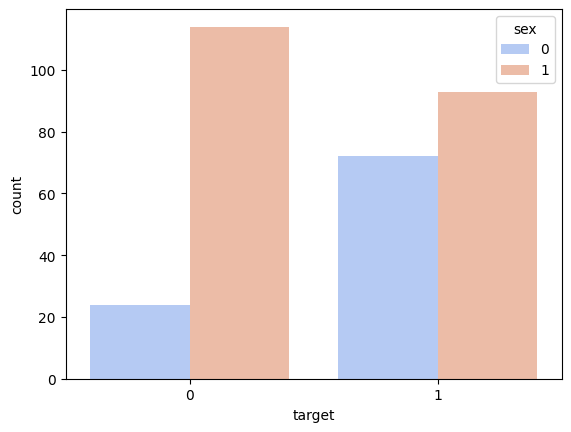

In [ ]:
conteo = df['target'].value_counts()

# Imprimir el conteo
print(f'Personas con enfermedad cardiaca,{conteo[1]}')
print(f'Personas sin enfermedad cardiaca,{conteo[0]}')
print(f'Contamos con {df.shape[0]} filas y {df.shape[1]} columnas')

sns.countplot(data=df, x="target", hue="sex", palette="coolwarm")
plt.show()


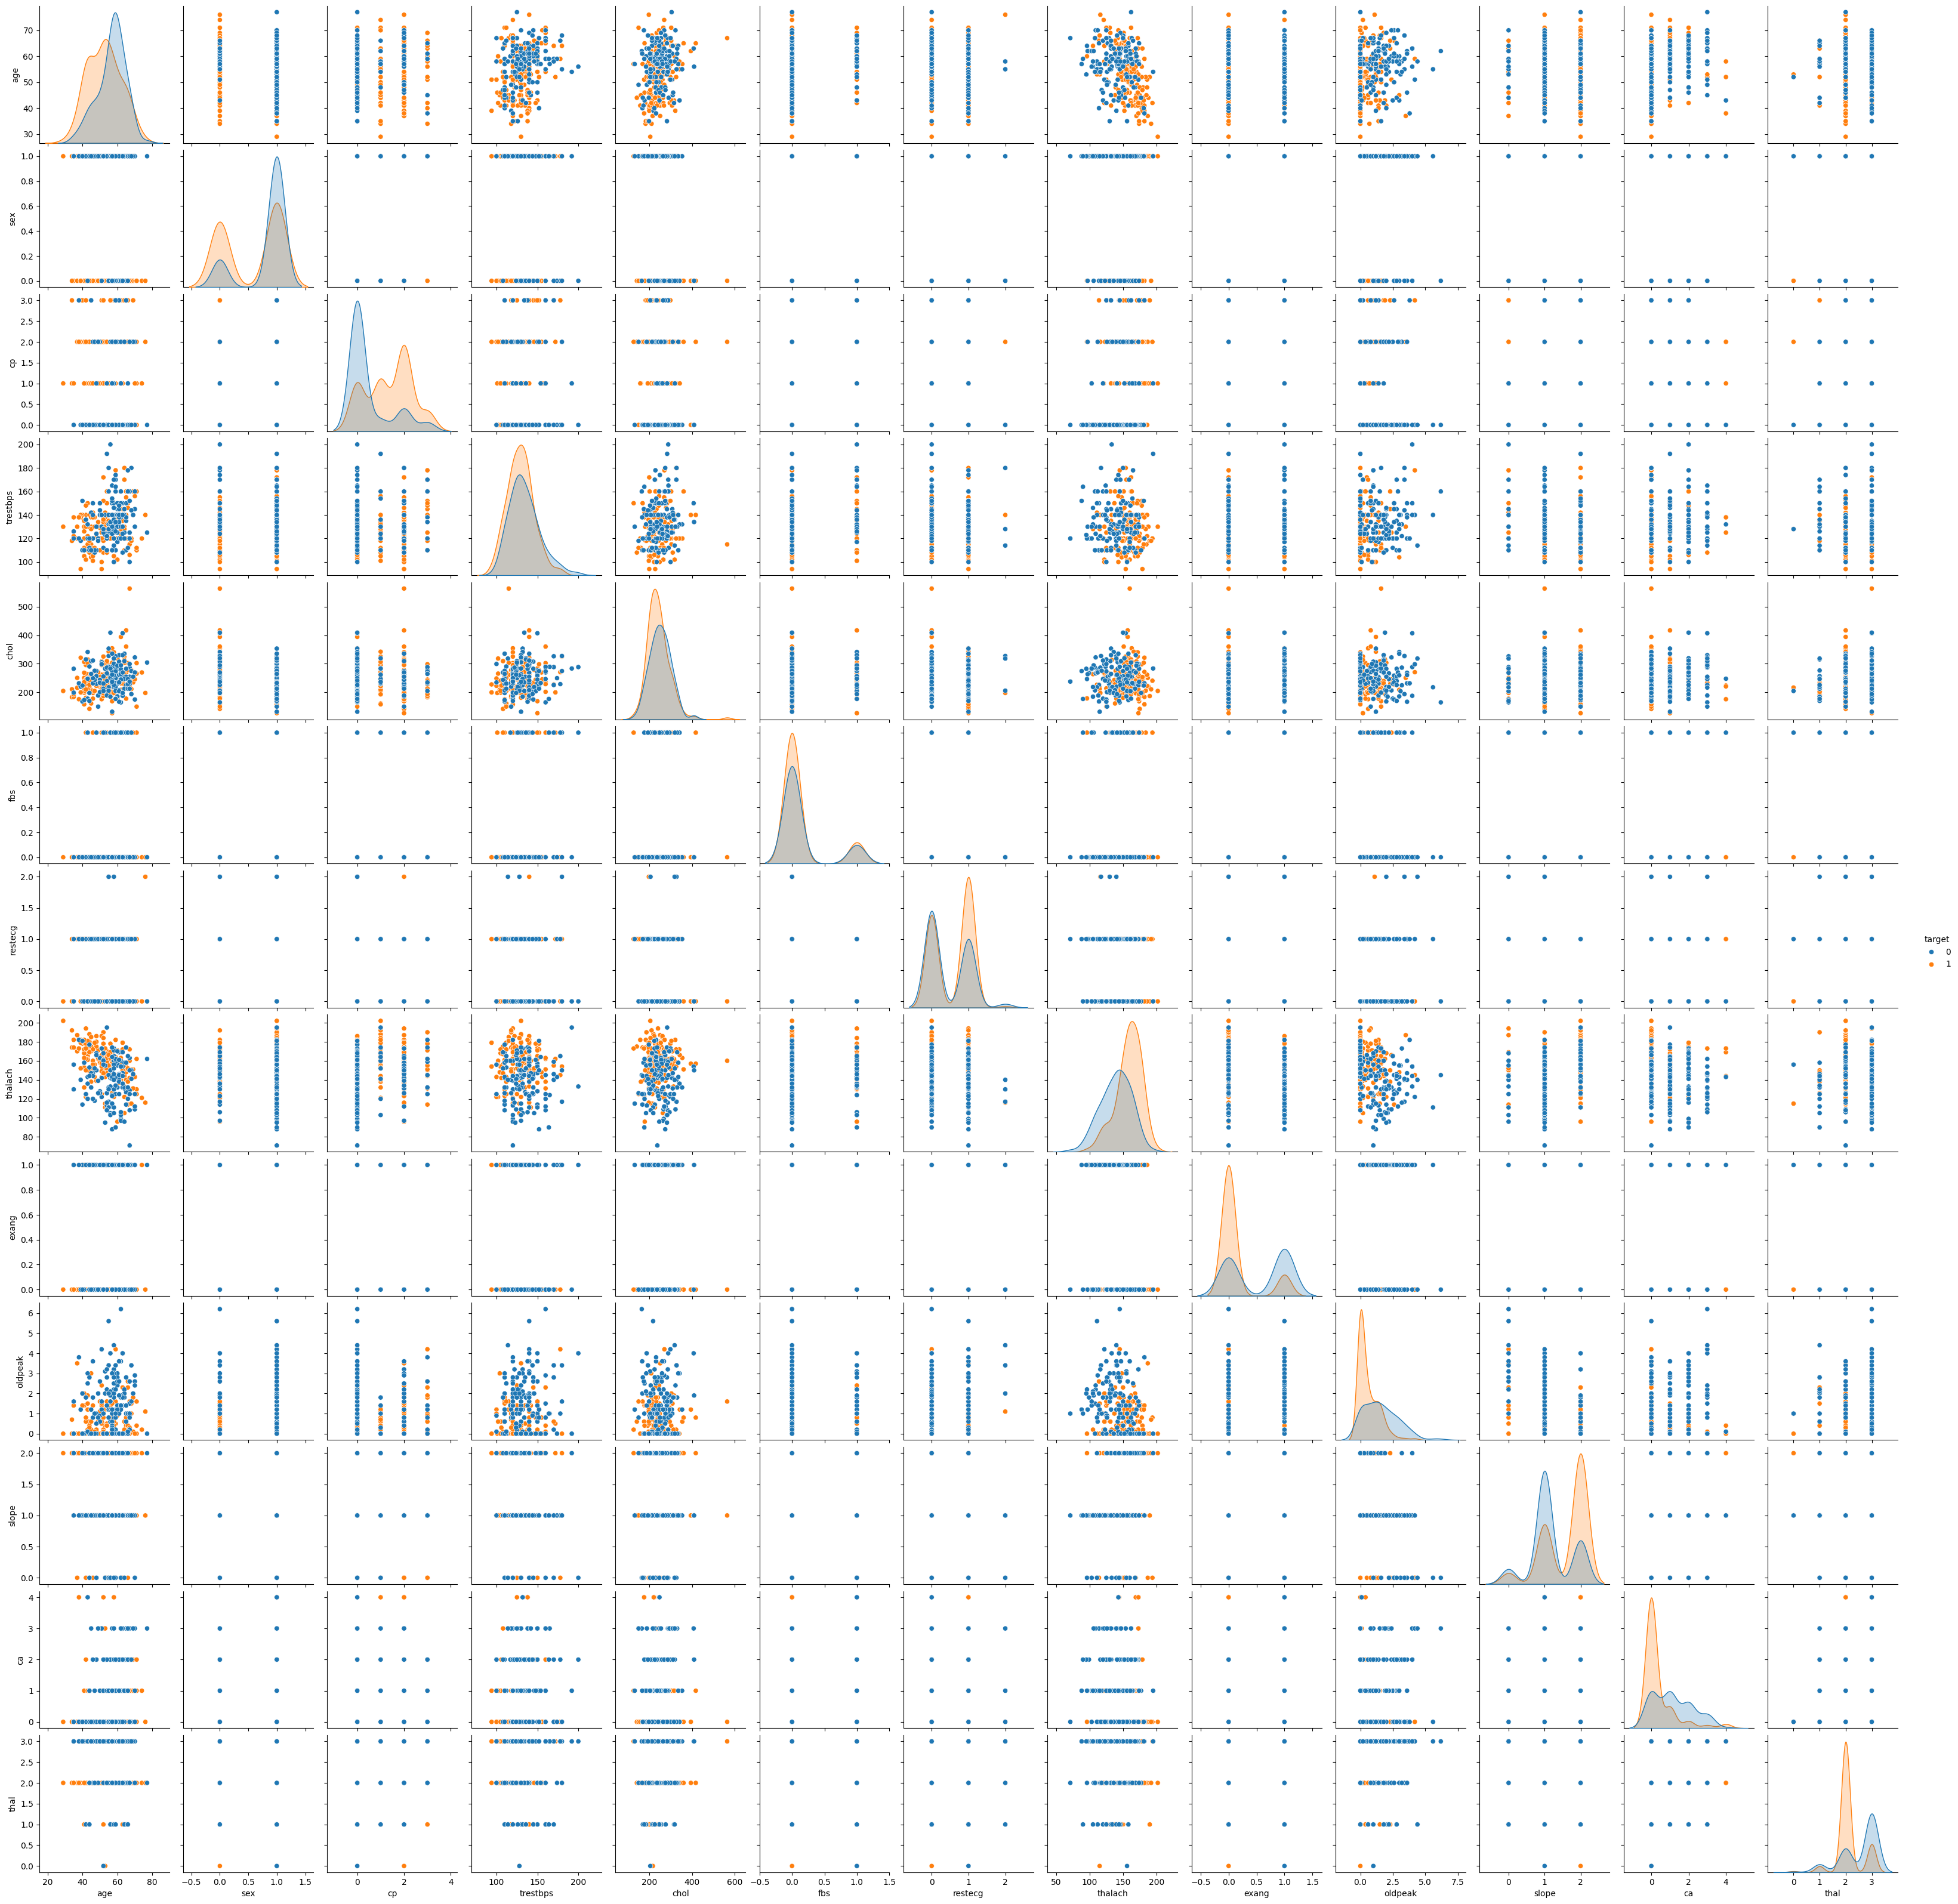

In [ ]:
#df.info()
#df.columns

sns.pairplot(df, hue='target')
plt.show()

Se implementa un modelo Random Forest debido a la complejidad de set de datos. Definir X y Y para el modelo.

In [ ]:
X = df.drop('target', axis=1).values
y = df['target'].values

Dividir los datos en train y test

In [ ]:
# Se importa la herramienta de sklearn.model_selectionl como train_test_split
from sklearn.model_selection import train_test_split

#se genere nuevos valores aleatorios
# y los conjuntos de datos de entrenamiento y pruebas serán diferentes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear un modelo de clasificacion con Random Forest

In [ ]:
# Se importa la herramienta de sklearn.ensemble como RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=14, max_depth=5, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)




Vemos el Gráfico del Arbol de decision

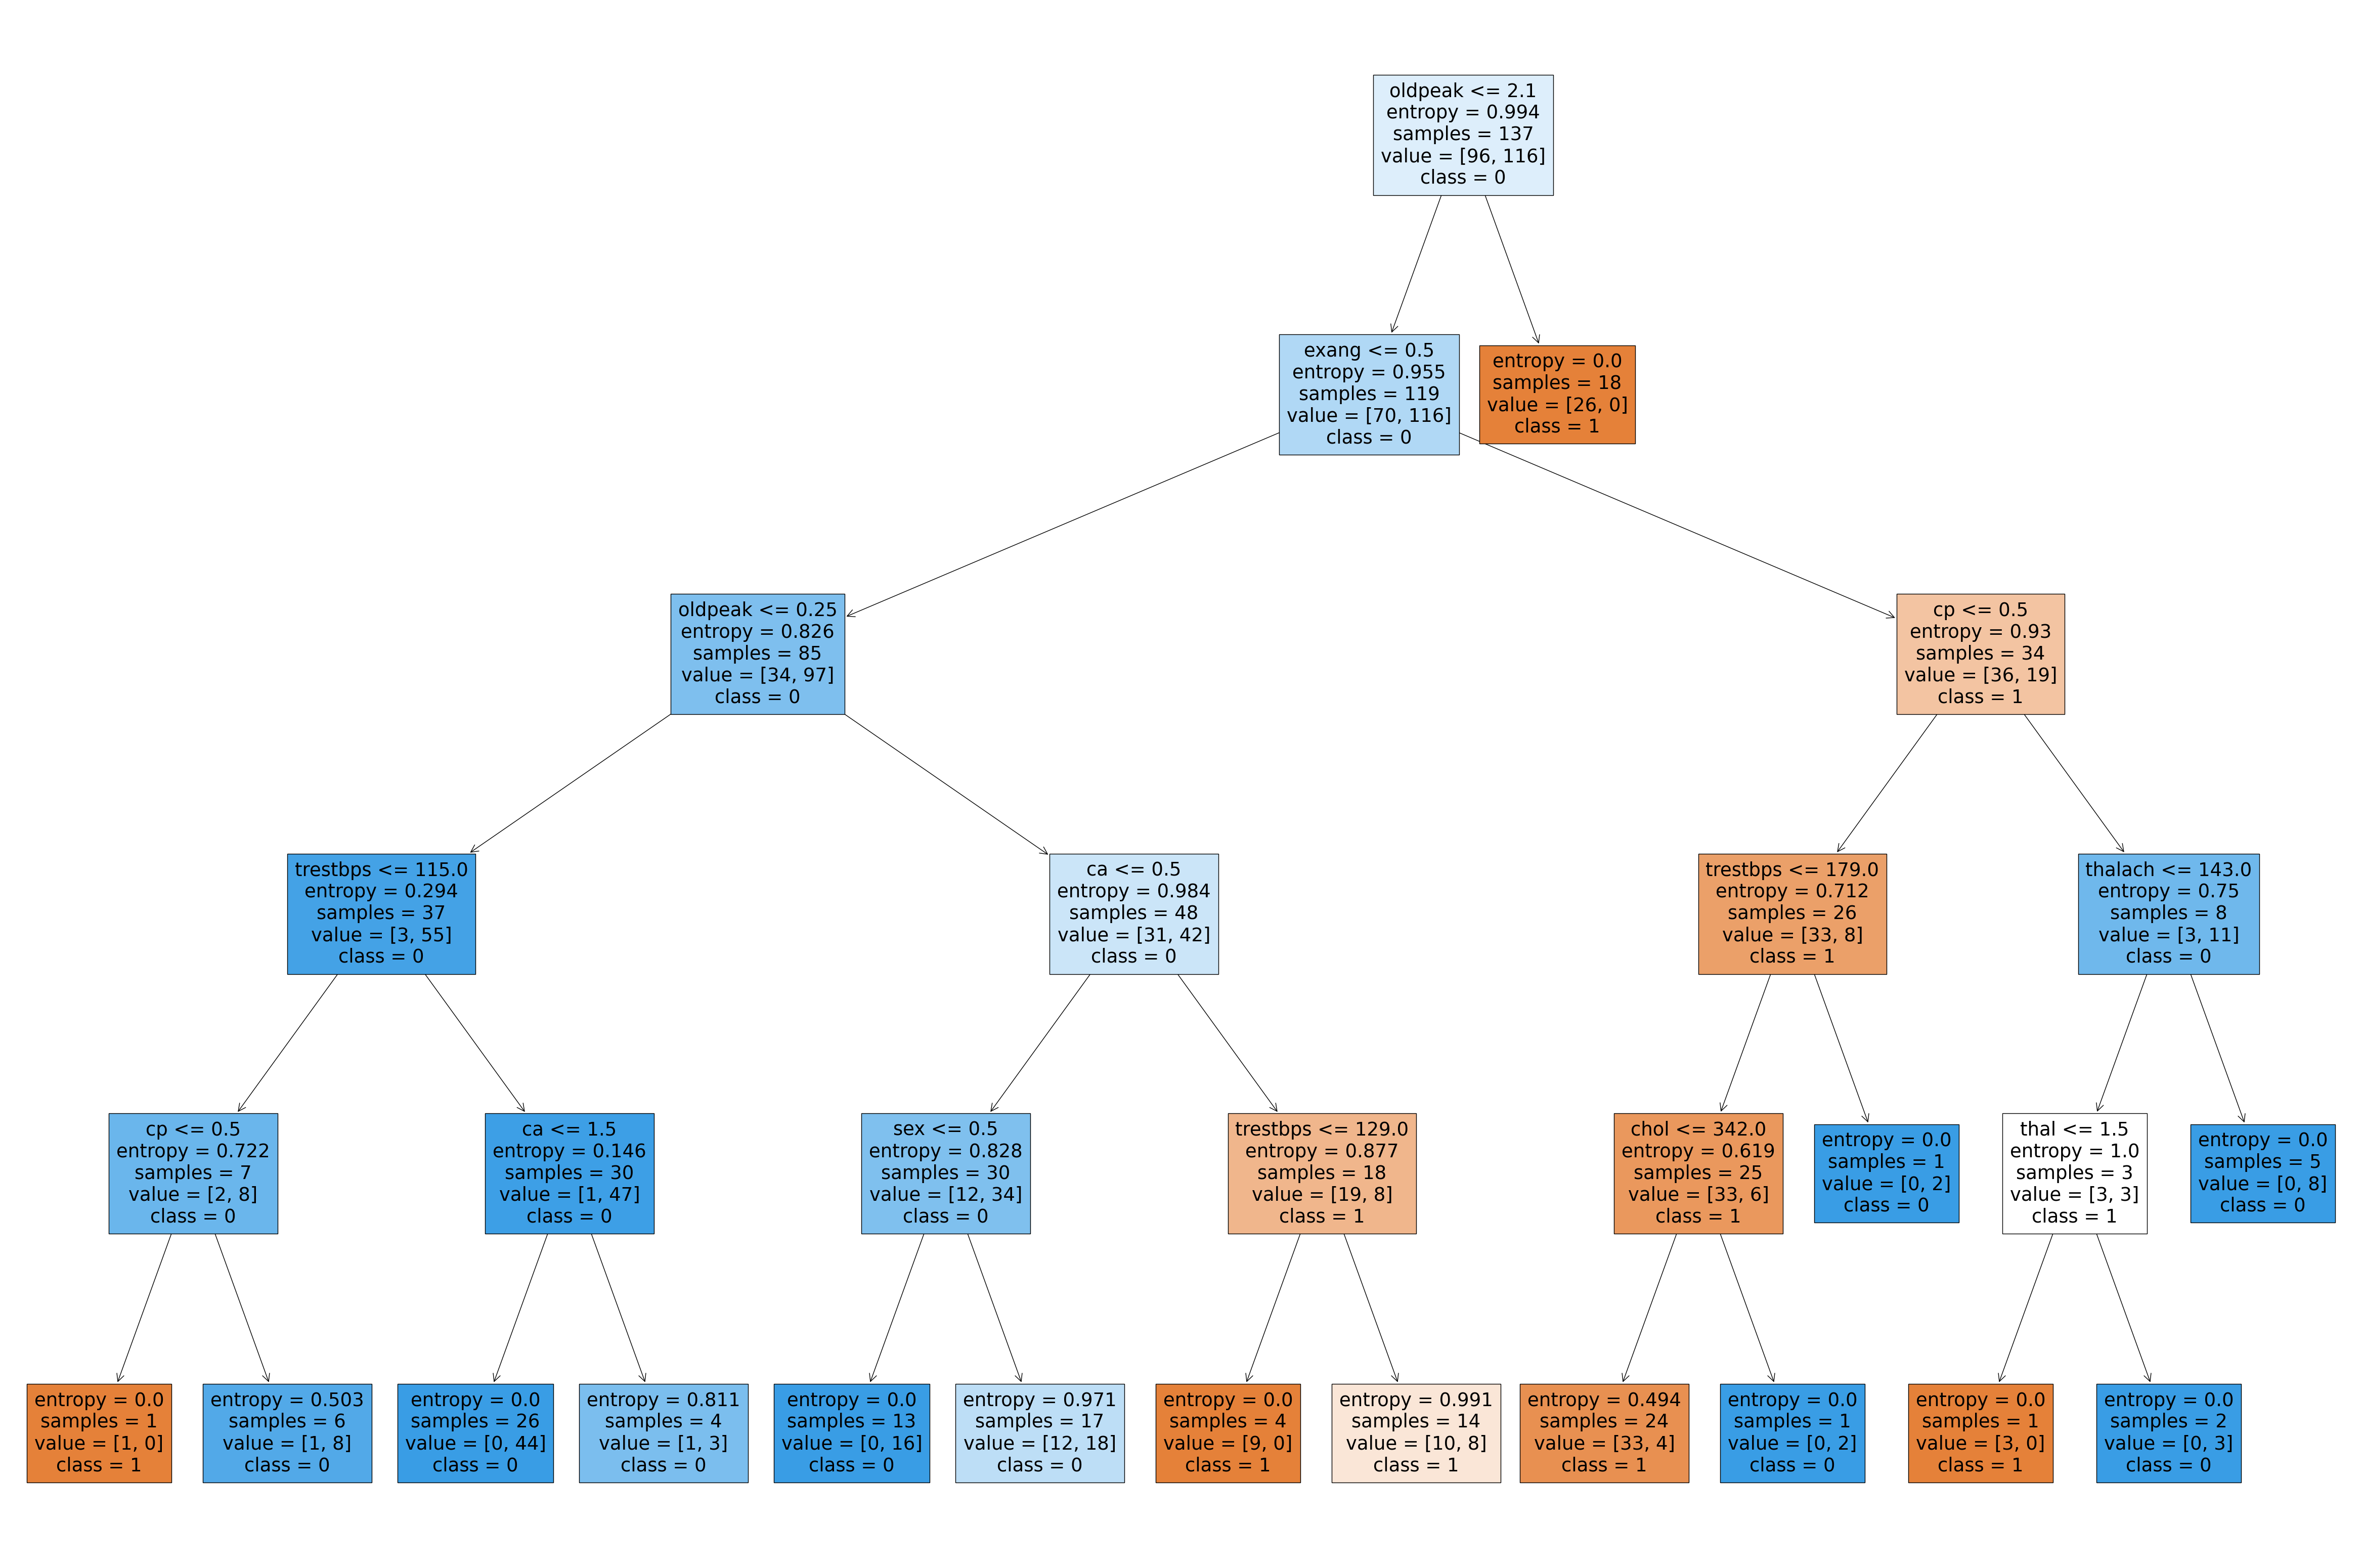

In [ ]:
# Se importa tree de sklearn
from sklearn import tree
import matplotlib.pyplot as plt

# Tomo el primer árbol de decisión del bosque para dibujar
estimator = clf.estimators_[0]

# Obtengo los nombres de las columnas utilizadas y las clases posibles
feature_names = df.drop('target', axis=1).columns

# Convierto las clases en cadenas de texto para evitar el error
class_names = list(map(str, df['target'].unique().tolist()))

# Se crea el espacio para dibujar con fig = plt.figure(figsize=(16, 9))
fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot()

# Representación gráfica del árbol
tree.plot_tree(estimator,
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               ax=ax)

# Muestra la figura
plt.show()

# Guarda la imagen
filename = 'hearttree.png'
fig.savefig(filename)

#### Validar el modelo

In [ ]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.8241758241758241

#### Matriz de confusión para evaluar la precisión del modelo

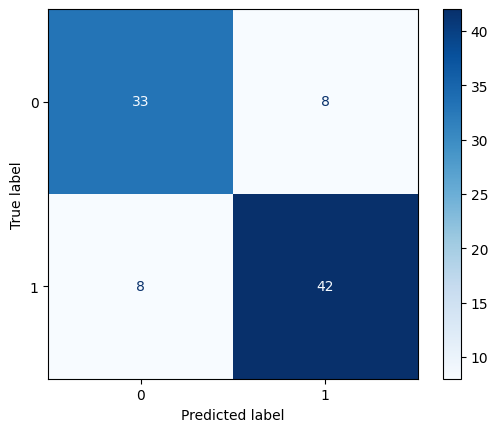

In [ ]:
# Se utliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test, y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Para mostrar la figura
plt.show()

#### Utilizar el Modelo


In [ ]:
df_prueba = pd.DataFrame({"Age":[28],'sex':[1], 'cp':[2], 'trestbps':[120], 'chol':[240], 'fbs':[1], 'restecg':[2], 'thalach':[71],
       'exang':[0], 'oldpeak':[1.4], 'slope':[2], 'ca':[0], 'thal':[2]})
df_prueba


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28,1,2,120,240,1,2,71,0,1.4,2,0,2


In [ ]:
X_prueba = df_prueba.values
y_hat_prueba = clf.predict(X_prueba)
y_hat_prueba

array([1])